In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('brain-proteomics.csv')

In [4]:
df.head()

,Case,years_to_birth,gender,histological_type,race,ethnicity,radiation_therapy,Grade,Mutation.Count,Percent.aneuploidy,...,p27_p,p27_pT157_p,p27_pT198_p,p38_pT180_Y182_p,p53_p,p62-LCK-ligand_p,p70S6K_p,p70S6K_pT389_p,p90RSK_p,p90RSK_pT359_S363_p
0,TCGA-CS-4938,31,female,astrocytoma,white,not hispanic or latino,no,G2,15,0.069412,...,-0.425127,-0.033398,0.289192,1.060163,-0.407456,-0.470354,-0.107559,-0.060441,-0.053104,-0.011132
1,TCGA-CS-6665,51,female,astrocytoma,white,not hispanic or latino,yes,G3,75,0.524814,...,0.076536,0.011809,-0.047973,-0.054275,-0.244020,0.106282,-0.034369,0.585072,0.431720,-0.201412
2,TCGA-CS-6666,22,male,astrocytoma,white,not hispanic or latino,yes,G3,18,0.403165,...,0.110268,0.066886,-0.066150,0.250434,0.432187,-0.210412,0.290949,-0.893383,-0.693677,-0.055250
3,TCGA-DB-5270,38,female,oligoastrocytoma,white,not hispanic or latino,no,G3,16,0.061382,...,-0.235321,0.015372,-0.127422,-1.190789,0.105396,0.218569,-0.099136,1.990618,0.166788,-0.235380
4,TCGA-DB-5273,33,male,astrocytoma,white,not hispanic or latino,yes,G3,16,0.017349,...,-0.343212,-0.250564,-0.234582,0.648598,-0.071851,-0.041811,-0.099300,-0.920359,-0.243159,-0.128841


In [5]:
X = df.drop(['Case', 'histological_type', 'race', 'ethnicity', 'radiation_therapy', 'Grade', 'Mutation.Count', 'Percent.aneuploidy', 'IDH.status', 'outcome'], axis = 1)

X.head()

,years_to_birth,gender,14-3-3_beta_p,14-3-3_epsilon_p,14-3-3_zeta_p,4E-BP1_p,4E-BP1_pS65_p,4E-BP1_pT37_T46_p,4E-BP1_pT70_p,53BP1_p,...,p27_p,p27_pT157_p,p27_pT198_p,p38_pT180_Y182_p,p53_p,p62-LCK-ligand_p,p70S6K_p,p70S6K_pT389_p,p90RSK_p,p90RSK_pT359_S363_p
0,31,female,0.026223,0.250940,-0.080954,-0.420471,-0.090392,0.000000,-0.808518,-1.003871,...,-0.425127,-0.033398,0.289192,1.060163,-0.407456,-0.470354,-0.107559,-0.060441,-0.053104,-0.011132
1,51,female,-0.002637,-0.340954,0.180070,0.022611,-0.081000,0.100052,0.161428,-0.557812,...,0.076536,0.011809,-0.047973,-0.054275,-0.244020,0.106282,-0.034369,0.585072,0.431720,-0.201412
2,22,male,-0.071522,-0.288344,0.608584,0.233311,-0.116463,0.182052,0.243324,0.256262,...,0.110268,0.066886,-0.066150,0.250434,0.432187,-0.210412,0.290949,-0.893383,-0.693677,-0.055250
3,38,female,0.119700,0.269015,0.682819,-0.346712,0.676627,-1.110090,-0.123306,-0.546849,...,-0.235321,0.015372,-0.127422,-1.190789,0.105396,0.218569,-0.099136,1.990618,0.166788,-0.235380
4,33,male,0.131162,0.086974,0.016835,-0.009144,-0.127323,0.138158,-0.098309,0.289628,...,-0.343212,-0.250564,-0.234582,0.648598,-0.071851,-0.041811,-0.099300,-0.920359,-0.243159,-0.128841


In [6]:
y = df['outcome']
y

0      1
1      1
2      1
3      1
4      1
      ..
301    1
302    0
303    0
304    1
305    0
Name: outcome, Length: 306, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

# train test split 

X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.35, stratify=y)


X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, stratify=y_val_test)

In [8]:
X_train.shape, X_val.shape, X_test.shape

((198, 176), (54, 176), (54, 176))

In [9]:
y_train.shape, y_val.shape, y_test.shape

((198,), (54,), (54,))

In [10]:
y_val.value_counts()

outcome
1    33
0    21
Name: count, dtype: int64

In [11]:
y_test.value_counts()

outcome
1    32
0    22
Name: count, dtype: int64

In [12]:
y_train.value_counts()

outcome
1    119
0     79
Name: count, dtype: int64

In [13]:
# ### Producing Synthetic data SMOTE

y_train.value_counts()[1]*2, y_train.value_counts()[0]*2

(238, 158)

In [14]:
X_train.head()

,years_to_birth,gender,14-3-3_beta_p,14-3-3_epsilon_p,14-3-3_zeta_p,4E-BP1_p,4E-BP1_pS65_p,4E-BP1_pT37_T46_p,4E-BP1_pT70_p,53BP1_p,...,p27_p,p27_pT157_p,p27_pT198_p,p38_pT180_Y182_p,p53_p,p62-LCK-ligand_p,p70S6K_p,p70S6K_pT389_p,p90RSK_p,p90RSK_pT359_S363_p
182,62,male,0.051047,-0.104973,0.230482,-0.193908,-0.135771,-0.774994,0.028617,-0.472813,...,0.411038,-0.061472,0.107890,0.268118,0.000000,-0.011557,-0.225195,0.712457,0.451198,-0.023856
113,30,female,0.332648,0.017942,0.414567,-0.499090,0.108714,-1.095644,0.386784,-0.507875,...,-0.074204,0.129472,-0.275514,-0.717241,0.016053,-0.059086,-0.222661,2.097866,0.071487,-0.241180
241,33,male,0.217741,-0.018780,0.791444,0.314623,0.341049,-0.557345,-0.135665,0.278754,...,0.306644,0.031771,0.100104,-0.489991,0.014328,0.028951,0.129050,-1.139604,0.111808,-0.144302
271,33,male,0.574246,-0.217568,1.320687,-0.181709,1.126463,1.135353,0.151573,1.043094,...,-0.382951,-0.039812,-0.299161,0.033271,-0.450938,-0.161916,0.021634,1.892069,0.029830,-0.111329
2,22,male,-0.071522,-0.288344,0.608584,0.233311,-0.116463,0.182052,0.243324,0.256262,...,0.110268,0.066886,-0.066150,0.250434,0.432187,-0.210412,0.290949,-0.893383,-0.693677,-0.055250


In [15]:
# # Create some new training data with SMOTE

from imblearn.over_sampling import SMOTE, SMOTENC

In [16]:
# n_samples = 200  # total number of data points you want for each class

sampler = SMOTENC(categorical_features=[0,1], sampling_strategy={0: y_train.value_counts()[0]*2, 1: y_train.value_counts()[1]*2})     

# resample both minority and majority classes


In [17]:
# reassigning X_train - y_train after SMOTE

X_train, y_train = sampler.fit_resample(X_train, y_train)

In [18]:
y_train.value_counts(normalize=True)

outcome
1    0.60101
0    0.39899
Name: proportion, dtype: float64

In [19]:
X_train

,years_to_birth,gender,14-3-3_beta_p,14-3-3_epsilon_p,14-3-3_zeta_p,4E-BP1_p,4E-BP1_pS65_p,4E-BP1_pT37_T46_p,4E-BP1_pT70_p,53BP1_p,...,p27_p,p27_pT157_p,p27_pT198_p,p38_pT180_Y182_p,p53_p,p62-LCK-ligand_p,p70S6K_p,p70S6K_pT389_p,p90RSK_p,p90RSK_pT359_S363_p
0,62,male,0.051047,-0.104973,0.230482,-0.193908,-0.135771,-0.774994,0.028617,-0.472813,...,0.411038,-0.061472,0.107890,0.268118,0.000000,-0.011557,-0.225195,0.712457,0.451198,-0.023856
1,30,female,0.332648,0.017942,0.414567,-0.499090,0.108714,-1.095644,0.386784,-0.507875,...,-0.074204,0.129472,-0.275514,-0.717241,0.016053,-0.059086,-0.222661,2.097866,0.071487,-0.241180
2,33,male,0.217741,-0.018780,0.791444,0.314623,0.341049,-0.557345,-0.135665,0.278754,...,0.306644,0.031771,0.100104,-0.489991,0.014328,0.028951,0.129050,-1.139604,0.111808,-0.144302
3,33,male,0.574246,-0.217568,1.320687,-0.181709,1.126463,1.135353,0.151573,1.043094,...,-0.382951,-0.039812,-0.299161,0.033271,-0.450938,-0.161916,0.021634,1.892069,0.029830,-0.111329
4,22,male,-0.071522,-0.288344,0.608584,0.233311,-0.116463,0.182052,0.243324,0.256262,...,0.110268,0.066886,-0.066150,0.250434,0.432187,-0.210412,0.290949,-0.893383,-0.693677,-0.055250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,34,female,-0.051719,0.132013,0.241082,-0.059607,0.372106,0.421596,0.105619,0.215230,...,0.070690,0.012006,0.018424,0.157334,0.006517,-0.060167,0.049849,1.115550,0.074299,-0.052827
392,46,female,-0.230075,0.074746,-0.188429,-0.195364,-0.116402,-0.196225,-0.079124,-0.041817,...,-0.369155,-0.115847,-0.093599,0.476579,-0.069602,0.082703,-0.157902,-0.517359,-0.092182,0.162620
393,57,female,-0.059116,0.048216,0.032749,0.034408,0.027556,0.314717,0.008748,-0.068991,...,0.005487,-0.007228,-0.092290,0.014318,0.042539,0.137259,0.024170,0.777537,0.095790,0.033393
394,61,female,-0.242259,-0.125918,0.051556,0.387651,0.012285,0.860532,-0.067646,0.039569,...,-0.211630,-0.028157,0.006906,-0.041463,0.945535,-0.158703,0.087658,0.159615,-0.167975,0.079530


In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn import set_config

set_config(display = 'diagram')

preproc_numerical = make_pipeline(
    MinMaxScaler()
)
preproc_categorical = make_pipeline(
    OrdinalEncoder()
)

In [21]:
from sklearn.compose import make_column_transformer, make_column_selector

preprocessor = make_column_transformer(
    (preproc_categorical, ['gender']),
    (preproc_numerical, make_column_selector(dtype_include=["int64", "float64"]))
)

preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['gender']),
                                ('pipeline-2',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9b2f13b730>)])

In [22]:
X_train = preprocessor.fit_transform(X_train)

In [23]:
X_train

array([[1.        , 0.65217391, 0.30305661, ..., 0.54520573, 0.82375904,
        0.36895611],
       [0.        , 0.1884058 , 0.50031627, ..., 0.83348087, 0.57845059,
        0.17824311],
       [1.        , 0.23188406, 0.41982477, ..., 0.15983012, 0.60449941,
        0.26325862],
       ...,
       [0.        , 0.57971014, 0.22588865, ..., 0.55874761, 0.59415123,
        0.41919471],
       [0.        , 0.63768116, 0.09759817, ..., 0.43017083, 0.42374882,
        0.45968263],
       [1.        , 0.13043478, 0.31124535, ..., 0.35774815, 0.46441542,
        0.44715972]])

In [24]:
X_train.shape

(396, 176)

In [25]:
y_train

0      1
1      1
2      0
3      0
4      1
      ..
391    1
392    1
393    1
394    1
395    1
Name: outcome, Length: 396, dtype: int64

In [26]:
X_val = preprocessor.transform(X_val)

X_test = preprocessor.transform(X_test)

In [27]:
features_age_gender = X.columns

In [28]:
### PCA

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

PCA()

In [29]:
W = pca.components_

In [30]:
# Print PCs as COLUMNS
W = pd.DataFrame(W.T,
                 index=features_age_gender,
                 columns=[f'PC{i}' for i in range(1, 177)])
W

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176
years_to_birth,-0.233678,0.009614,0.252923,0.399260,-0.786776,-0.212585,-0.018145,-0.109671,0.068935,0.083970,...,0.000478,0.000652,0.000124,0.000711,0.001015,-0.001644,-0.001827,0.000585,-0.000271,-0.000664
gender,0.022512,0.025060,-0.030260,0.090719,0.033399,-0.097652,0.046017,0.001238,-0.071491,0.024966,...,0.005259,-0.002813,-0.008159,0.000615,0.000706,0.001633,-0.000795,-0.003245,0.000054,-0.001036
14-3-3_beta_p,0.061350,-0.035802,0.106076,0.059155,0.032335,0.110322,0.075048,0.026677,0.023851,0.076770,...,-0.020736,-0.056235,-0.078169,0.000590,-0.044571,-0.225651,-0.018309,0.020874,-0.013442,0.162706
14-3-3_epsilon_p,-0.023541,-0.128015,-0.059741,-0.069498,-0.056495,0.040254,-0.086403,0.009103,-0.044060,0.109583,...,-0.082600,0.056514,0.121881,0.127959,-0.129061,-0.021315,0.049476,0.091115,0.053071,-0.009709
14-3-3_zeta_p,0.173962,-0.019520,0.074760,0.058612,0.025956,0.044704,0.008443,-0.028004,0.114527,0.094561,...,-0.003462,-0.058505,-0.075793,0.088065,0.009003,0.089365,-0.003101,0.004368,-0.012081,-0.067146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p62-LCK-ligand_p,-0.000665,-0.009264,-0.041850,-0.000307,-0.013375,-0.000842,0.078246,-0.079879,-0.004468,-0.002172,...,-0.080091,-0.002834,-0.066592,-0.078556,0.073066,0.141223,-0.121863,-0.038342,-0.007766,-0.087645
p70S6K_p,0.038989,0.041736,-0.080324,0.041479,-0.040383,0.060574,-0.031223,0.031352,0.023446,-0.009477,...,0.045160,-0.130042,-0.033958,-0.101376,0.177552,0.023710,0.001737,-0.047432,-0.064437,0.027483
p70S6K_pT389_p,0.172687,-0.057130,0.044584,-0.085470,-0.045058,-0.073272,0.062743,0.019717,-0.054407,-0.000073,...,0.022374,-0.086338,0.024238,-0.068962,-0.025721,0.011019,-0.071941,-0.083190,-0.077750,0.015652
p90RSK_p,0.089061,-0.071674,0.011604,-0.067882,-0.045427,-0.080152,-0.097664,-0.058164,-0.046614,0.007762,...,0.025488,0.077389,0.053124,-0.016115,-0.079113,-0.084220,0.015445,-0.080700,0.059904,-0.023868


In [31]:
#### X_train_proj with 174 PCs

X_train_proj = pca.transform(X_train)
X_train_proj = pd.DataFrame(X_train_proj, columns=[f'PC{i}' for i in range(1, 177)])
X_train_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176
0,0.436247,0.264664,1.174251,-0.199009,-0.466239,-0.086704,0.113418,-0.840467,-0.369996,-0.228639,...,-0.000047,-0.007020,0.008215,0.003934,-0.004427,-0.009495,-0.002829,-0.004609,0.001361,-0.000118
1,1.411988,-1.309237,0.291300,-0.014280,0.311423,-0.117005,0.280795,-0.103318,-0.384690,-0.142269,...,0.018923,0.010717,0.003310,0.015309,0.009437,-0.018682,-0.005206,-0.000904,0.003034,-0.004025
2,0.652080,-0.708913,0.334941,0.804769,-0.199461,-0.314305,-0.137111,0.044497,1.288731,0.028898,...,-0.008224,-0.018828,0.014246,-0.011329,0.014442,-0.010813,0.000577,-0.001838,0.001571,0.002070
3,2.280562,0.824062,0.281225,0.613593,-0.871937,0.261279,0.297117,0.327777,0.639448,0.547946,...,-0.000366,0.004856,0.003615,0.015757,0.007888,-0.007913,-0.002323,0.004805,-0.000448,-0.000691
4,-0.346433,1.644684,0.270939,0.791447,-0.147802,0.689876,0.249005,0.157636,0.058327,0.141549,...,-0.001576,-0.006969,0.001820,-0.007178,-0.004917,-0.004442,0.003988,-0.005395,0.006719,0.002416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,0.800669,0.058087,-0.207492,-0.101332,0.254552,0.070807,-0.021187,0.136454,-0.015633,0.100347,...,-0.002906,-0.000726,-0.000104,-0.001423,-0.000871,0.000534,-0.002541,0.002597,0.002445,-0.000462
392,-0.131830,0.758701,-0.269956,-0.429961,0.516435,-0.459367,0.157284,-0.608086,-0.205550,-0.114360,...,-0.003535,0.000756,-0.001187,-0.001158,-0.003991,-0.005631,-0.001747,-0.001061,-0.000127,-0.000043
393,0.197451,0.078805,-0.491733,-0.325033,0.340848,-0.246781,0.216941,0.041325,-0.177057,0.119738,...,-0.005518,-0.004862,0.000496,-0.001648,0.003860,-0.000863,-0.002237,-0.001237,0.002671,0.000146
394,-0.300580,0.667295,-0.881097,0.061351,0.582921,-0.373263,0.465302,0.122609,-0.032898,-0.202032,...,-0.000319,0.002771,-0.002699,-0.001517,-0.003503,0.000650,0.001315,0.004698,0.002015,0.001288


In [32]:
# Transforming X_val to PC projections

X_val_proj = pca.transform(X_val)
X_val_proj = pd.DataFrame(X_val_proj, columns=[f'PC{i}' for i in range(1, 177)])
X_val_proj.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176
0,-0.365786,0.282803,-0.238883,-0.362038,-0.828504,-0.336907,0.138054,0.544557,-0.026479,-0.196700,...,0.011151,0.038469,0.039444,0.046273,-0.000510,0.007944,-0.068825,0.011257,0.052139,-0.053090
1,-1.853231,-0.660020,-0.261431,-0.637053,-0.456452,-0.028995,0.146482,0.200045,-0.195045,0.569018,...,-0.051658,-0.030552,-0.032203,-0.008509,0.036671,-0.024884,-0.039295,0.000965,0.040312,-0.035141
2,-1.033141,-0.250934,-0.616070,0.205184,1.017992,-0.516519,0.007158,0.422957,-0.169954,0.217291,...,0.099085,0.042856,-0.022258,0.057335,-0.047655,0.033693,-0.194254,-0.151055,-0.040273,-0.005013
3,-0.251157,0.960387,-0.370475,0.629606,-0.340634,-0.001586,-0.553432,0.333944,-0.157652,0.079839,...,-0.042039,0.013557,0.007062,0.102035,0.034587,-0.058833,-0.047802,-0.007990,0.042378,0.021174
4,0.263527,0.913110,-0.774005,0.587351,0.639121,-0.222134,-0.101893,0.337066,-0.576936,-0.295050,...,0.040786,0.032905,0.093663,0.042557,-0.007657,-0.007143,-0.155813,-0.115875,-0.032885,-0.068841


In [33]:
# Transforming X_test to PC projections

X_test_proj = pca.transform(X_test)
X_test_proj = pd.DataFrame(X_test_proj, columns=[f'PC{i}' for i in range(1, 177)])
X_test_proj.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC167,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176
0,-0.130436,0.692973,0.931250,-0.976815,0.427573,0.244495,-0.388896,0.173782,0.110592,-0.342309,...,0.125770,-0.040640,-0.019930,0.010867,0.021413,0.042362,-0.061085,-0.044251,0.035637,-0.038714
1,-0.095806,-0.317630,0.073160,-0.477994,0.475008,0.190103,-0.216260,-0.313829,0.144615,0.084478,...,0.009787,-0.009294,0.008134,-0.050970,-0.120701,0.010354,-0.066732,0.025677,-0.066370,0.068252
2,1.079025,-0.051875,0.232283,0.085213,-0.563507,-0.670399,-0.366419,0.137180,0.162483,0.370766,...,-0.013629,0.002417,-0.020341,0.082439,-0.056229,-0.007848,-0.020741,-0.004827,0.011284,0.008040
3,0.727468,-0.813691,0.264271,0.513671,-0.357057,-0.169854,-0.003831,-0.354692,0.022553,0.105369,...,-0.014120,-0.007503,0.027018,0.015775,0.037347,-0.028055,-0.065173,0.005545,-0.037975,0.024346
4,-0.377592,-0.794945,-0.015056,-0.303021,-0.583400,-0.557387,0.570563,0.403123,-0.243122,0.178766,...,0.015481,0.067292,-0.017954,0.034638,0.011572,-0.006869,-0.017937,0.004478,-0.011564,-0.010068


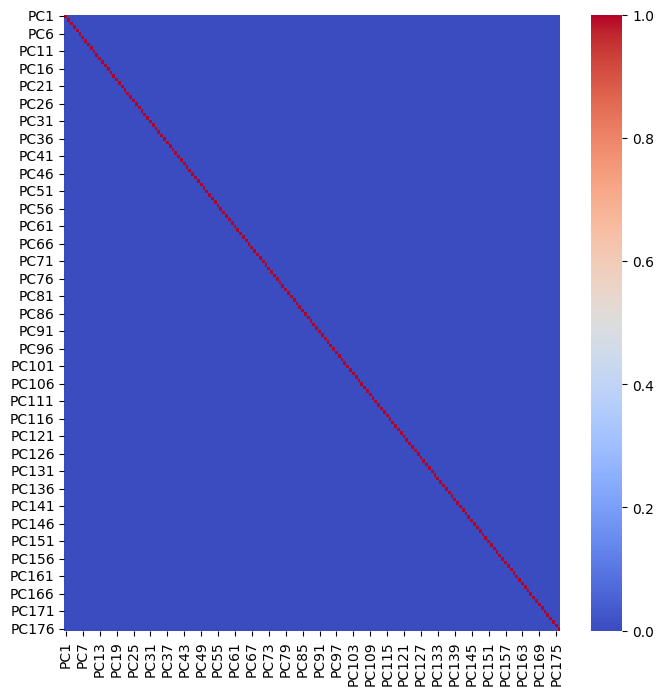

In [34]:
plt.figure(figsize=(8,8))
sns.heatmap(X_train_proj.corr(), cmap='coolwarm');

In [35]:
# # Computational proof
# W = pca.components_.T
# print("Shape of W: ", W.shape)
# print("Shape of X_train", X_train.shape)

In [36]:
# Compute PCs
eig_vals, eig_vecs = np.linalg.eig(np.dot(X_train.T,X_train))

In [37]:
# Let's compute it
((X_train_proj.std()**2 / ((X_train.std()**2).sum()))).sum()

103.37095583085728

In [38]:
PCs_variance = pd.DataFrame(X_train_proj.std()**2 / ((X_train.std()**2).sum()))
PCs_variance

,0
PC1,14.734802
PC2,13.805576
PC3,9.349251
PC4,7.565490
PC5,6.992742
...,...
PC172,0.000753
PC173,0.000437
PC174,0.000347
PC175,0.000233


In [39]:
# Sklearn provides it automatically
pca.explained_variance_ratio_

array([1.42542958e-01, 1.33553727e-01, 9.04436960e-02, 7.31877730e-02,
       6.76470670e-02, 4.08046822e-02, 3.68689743e-02, 3.23812581e-02,
       2.57517567e-02, 2.35356325e-02, 2.06243070e-02, 1.81425869e-02,
       1.55844671e-02, 1.33193809e-02, 1.19838743e-02, 1.18356808e-02,
       1.04883045e-02, 9.97189144e-03, 9.74778657e-03, 8.97801799e-03,
       8.26857528e-03, 7.89627860e-03, 7.45306679e-03, 7.03336302e-03,
       6.72124556e-03, 6.35773197e-03, 6.28001269e-03, 5.83390157e-03,
       5.31996925e-03, 5.01662511e-03, 4.91001157e-03, 4.81190481e-03,
       4.47162443e-03, 4.32879336e-03, 4.24474076e-03, 4.11816856e-03,
       3.86094393e-03, 3.64754353e-03, 3.50920169e-03, 3.38124600e-03,
       3.29607853e-03, 3.18629426e-03, 3.06967844e-03, 2.98474223e-03,
       2.97510608e-03, 2.90267871e-03, 2.64041464e-03, 2.59538122e-03,
       2.44708094e-03, 2.37697565e-03, 2.33149848e-03, 2.23391060e-03,
       2.20027121e-03, 2.08356795e-03, 2.07972452e-03, 1.97697499e-03,
      

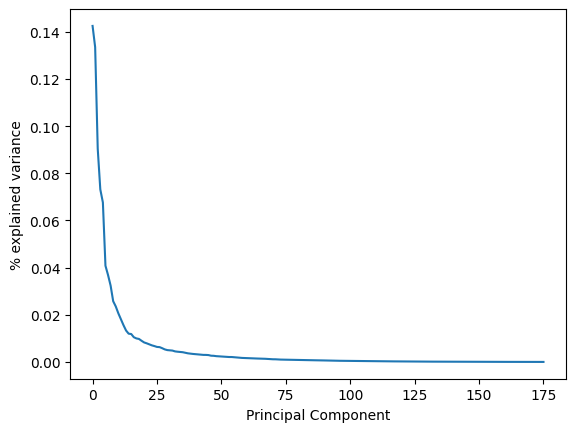

In [40]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); 
plt.ylabel('% explained variance');

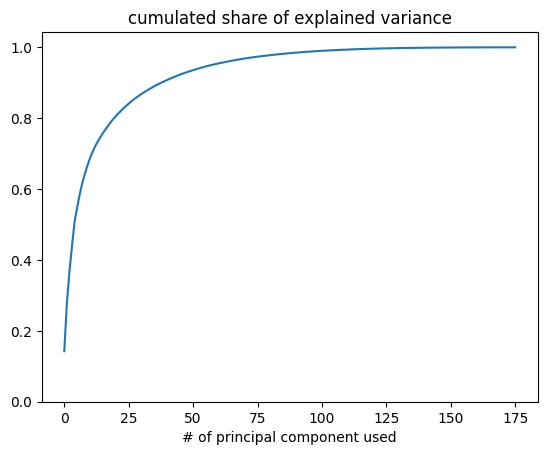

In [41]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');

In [42]:
PCs_variance[PCs_variance[0]>=0.5]

,0
PC1,14.734802
PC2,13.805576
PC3,9.349251
PC4,7.565490
PC5,6.992742
PC6,4.218019
PC7,3.811181
PC8,3.347282
PC9,2.661984
PC10,2.432901


In [43]:
#### X_train_proj30 with 30 PCs

# Fit a PCA with 30 components
pca30 = PCA(n_components=30).fit(X_train)

# Project your data into 25 dimensions
X_train_proj30 = pd.DataFrame(pca30.fit_transform(X_train), columns=[f'PC{i}' for i in range(1, 31)])

# We have "compressed" our dataset in 30D
X_train_proj30

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,0.436247,0.264664,1.174251,-0.199009,-0.466239,-0.086704,0.113418,-0.840467,-0.369996,-0.228639,...,0.270471,0.243631,0.213036,-0.010092,-0.172672,-0.264490,0.231541,-0.092713,0.110220,0.343816
1,1.411988,-1.309237,0.291300,-0.014280,0.311423,-0.117005,0.280795,-0.103318,-0.384690,-0.142269,...,-0.146245,-0.132560,-0.247097,0.177432,0.001808,-0.125013,-0.000687,-0.111686,0.014979,-0.009800
2,0.652080,-0.708913,0.334941,0.804769,-0.199461,-0.314305,-0.137111,0.044497,1.288731,0.028898,...,-0.074210,0.048186,0.042984,-0.109507,-0.051245,0.398168,0.200586,-0.206424,0.242147,-0.260239
3,2.280562,0.824062,0.281225,0.613593,-0.871937,0.261279,0.297117,0.327777,0.639448,0.547946,...,-0.096997,-0.414501,0.543080,0.433047,-0.045725,-0.184342,0.153067,-0.054514,0.065137,-0.084796
4,-0.346433,1.644684,0.270939,0.791447,-0.147802,0.689876,0.249005,0.157636,0.058327,0.141549,...,-0.011470,-0.023600,0.131531,-0.105065,-0.471547,-0.194459,-0.240460,-0.063514,0.012414,0.138293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,0.800669,0.058087,-0.207492,-0.101332,0.254552,0.070807,-0.021187,0.136454,-0.015633,0.100347,...,-0.135403,-0.028531,-0.112979,0.069643,0.000156,-0.094000,-0.034081,-0.098550,-0.168726,-0.167479
392,-0.131830,0.758701,-0.269956,-0.429961,0.516435,-0.459367,0.157284,-0.608086,-0.205550,-0.114360,...,0.066694,0.234722,0.209593,0.244224,0.059695,0.032682,-0.071354,-0.133794,0.123396,-0.189989
393,0.197451,0.078805,-0.491733,-0.325033,0.340848,-0.246781,0.216941,0.041325,-0.177057,0.119738,...,-0.078920,-0.004782,0.049769,-0.029552,0.068218,-0.161473,-0.008799,0.042963,0.022632,0.090050
394,-0.300580,0.667295,-0.881097,0.061351,0.582921,-0.373263,0.465302,0.122609,-0.032898,-0.202032,...,0.191137,0.049299,-0.244511,0.095804,0.000882,0.252815,0.097932,0.117649,-0.175336,0.154811


In [44]:
# Transforming X_val to 30 PC projections

X_val_proj30 = pca30.transform(X_val)
X_val_proj30 = pd.DataFrame(X_val_proj30, columns=[f'PC{i}' for i in range(1, 31)])
X_val_proj30.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-0.365786,0.282803,-0.238883,-0.362038,-0.828504,-0.336907,0.138054,0.544557,-0.026479,-0.196700,...,0.113294,0.100034,0.080741,-0.100472,-0.010661,0.060026,0.168318,0.062818,0.014910,0.061784
1,-1.853231,-0.660020,-0.261431,-0.637053,-0.456452,-0.028995,0.146482,0.200045,-0.195045,0.569018,...,0.044639,0.053380,-0.026094,0.173041,-0.088478,-0.129785,-0.026516,-0.142570,-0.059096,0.035189
2,-1.033141,-0.250934,-0.616070,0.205184,1.017992,-0.516519,0.007158,0.422957,-0.169954,0.217291,...,0.092698,-0.195292,0.071067,-0.239821,0.273689,0.052986,-0.542357,-0.239462,-0.111807,-0.215182
3,-0.251157,0.960387,-0.370475,0.629606,-0.340634,-0.001586,-0.553432,0.333944,-0.157652,0.079839,...,0.011781,-0.146847,0.151010,-0.111964,0.030660,-0.134476,0.059453,0.236149,-0.101434,-0.165425
4,0.263527,0.913110,-0.774005,0.587351,0.639121,-0.222134,-0.101893,0.337066,-0.576936,-0.295050,...,0.277387,0.094272,-0.110787,-0.116699,0.165276,0.095805,0.332860,-0.133729,0.267227,-0.323745


In [45]:
# Transforming X_test to 30 PC projections

X_test_proj30 = pca30.transform(X_test)
X_test_proj30 = pd.DataFrame(X_test_proj30, columns=[f'PC{i}' for i in range(1, 31)])
X_test_proj30.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-0.130436,0.692973,0.931250,-0.976815,0.427573,0.244495,-0.388896,0.173782,0.110592,-0.342309,...,0.066434,0.178461,-0.041152,0.409095,0.007085,0.231311,0.034712,0.108726,-0.215979,0.208677
1,-0.095806,-0.317630,0.073160,-0.477994,0.475008,0.190103,-0.216260,-0.313829,0.144615,0.084478,...,-0.224341,-0.245492,-0.081106,0.111703,-0.056452,0.317189,0.120582,-0.019152,-0.177700,0.152517
2,1.079025,-0.051875,0.232283,0.085213,-0.563507,-0.670399,-0.366419,0.137180,0.162483,0.370766,...,0.077290,-0.000337,-0.030191,0.015672,-0.018116,0.074698,-0.027548,-0.085445,-0.084537,0.015335
3,0.727468,-0.813691,0.264271,0.513671,-0.357057,-0.169854,-0.003831,-0.354692,0.022553,0.105369,...,0.042519,-0.144468,-0.030415,-0.138646,0.198187,0.036143,-0.274518,0.045800,0.086344,0.039787
4,-0.377592,-0.794945,-0.015056,-0.303021,-0.583400,-0.557387,0.570563,0.403123,-0.243122,0.178766,...,-0.076870,-0.035392,0.221799,0.100892,0.127806,0.018128,0.046187,-0.015862,0.052423,-0.009613


In [46]:
### Stochastic Gradient Descent Classifier on X_train

In [47]:
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [48]:
sgd_X = SGDClassifier(alpha=0.001, loss='modified_huber', penalty='l2')

sgd_X.fit(X_train, y_train)

# Make predictions
y_pred_sgd_X = sgd_X.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_sgd_X)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_sgd_X))

Accuracy: 0.7222222222222222

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.71      0.67        21
           1       0.80      0.73      0.76        33

    accuracy                           0.72        54
   macro avg       0.71      0.72      0.71        54
weighted avg       0.73      0.72      0.72        54



In [49]:
cm = confusion_matrix(y_val, y_pred_sgd_X, labels=sgd_X.classes_)
cm

array([[15,  6],
       [ 9, 24]])

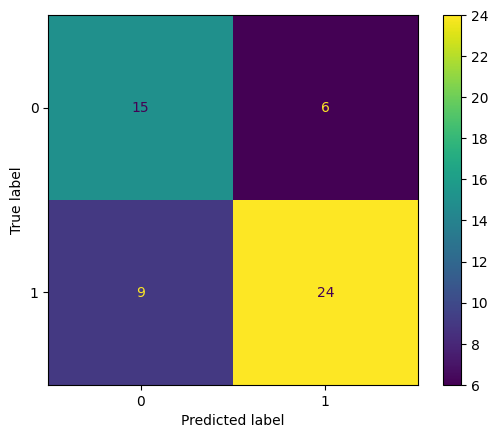

In [50]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=sgd_X.classes_)
disp.plot();

In [51]:
### Stochastic Gradient Descent Classifier on X_train_proj30

In [52]:
sgd_Xproj30 = SGDClassifier(alpha=0.001, loss='log_loss', penalty='elasticnet')

sgd_Xproj30.fit(X_train_proj30, y_train)

# Make predictions
y_pred_sgd_X_proj30 = sgd_Xproj30.predict(X_val_proj30)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_sgd_X_proj30)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_sgd_X_proj30))

Accuracy: 0.7592592592592593

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.81      0.72        21
           1       0.86      0.73      0.79        33

    accuracy                           0.76        54
   macro avg       0.76      0.77      0.76        54
weighted avg       0.78      0.76      0.76        54



In [53]:
cm = confusion_matrix(y_val, y_pred_sgd_X_proj30, labels=sgd_Xproj30.classes_)
cm

array([[17,  4],
       [ 9, 24]])

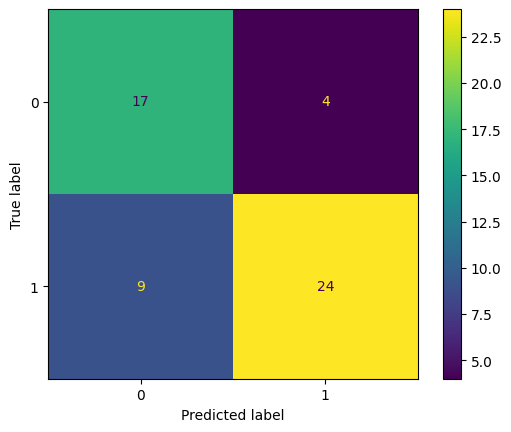

In [54]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=sgd_Xproj30.classes_)
disp.plot();

In [55]:
### Support Vector Classifier

In [56]:
from sklearn.svm import SVC

In [57]:
## For X

# Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

In [58]:
# instantiate
svc_X = SVC(kernel='rbf', C=10, gamma='auto')

# Train the classifier
svc_X.fit(X_train, y_train)

SVC(C=10, gamma='auto')

In [59]:
# Make predictions
y_pred_svc_X = svc_X.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_svc_X)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_svc_X))

Accuracy: 0.7962962962962963

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.67      0.72        21
           1       0.81      0.88      0.84        33

    accuracy                           0.80        54
   macro avg       0.79      0.77      0.78        54
weighted avg       0.79      0.80      0.79        54



In [60]:
cm = confusion_matrix(y_val, y_pred_svc_X, labels=svc_X.classes_)
cm

array([[14,  7],
       [ 4, 29]])

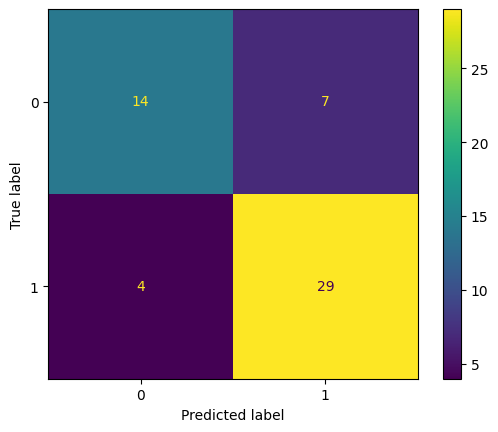

In [61]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svc_X.classes_)
disp.plot();

In [62]:
## For X_proj30

# Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [63]:
# instantiate
svc_X_proj30 = SVC(kernel='linear', C=0.1, gamma='scale')

# Train the classifier
svc_X_proj30.fit(X_train_proj30, y_train)

SVC(C=0.1, kernel='linear')

In [64]:
# Make predictions
y_pred_svc_X_proj30 = svc_X_proj30.predict(X_val_proj30)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_svc_X_proj30)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_svc_X_proj30))

Accuracy: 0.7592592592592593

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.57      0.65        21
           1       0.76      0.88      0.82        33

    accuracy                           0.76        54
   macro avg       0.76      0.73      0.73        54
weighted avg       0.76      0.76      0.75        54



In [65]:
cm = confusion_matrix(y_val, y_pred_svc_X_proj30, labels=svc_X_proj30.classes_)
cm

array([[12,  9],
       [ 4, 29]])

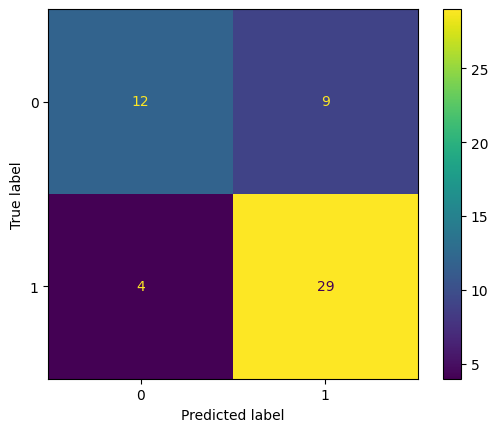

In [66]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svc_X_proj30.classes_)
disp.plot();

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

In [68]:
log_reg_model_X = LogisticRegression(max_iter=1000)

log_reg_model_X.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [69]:
y_pred_log_X = log_reg_model_X.predict(X_val)

In [70]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_log_X)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_log_X))

Accuracy: 0.7407407407407407

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.76      0.70        21
           1       0.83      0.73      0.77        33

    accuracy                           0.74        54
   macro avg       0.73      0.74      0.73        54
weighted avg       0.75      0.74      0.74        54



In [71]:
cm = confusion_matrix(y_val, y_pred_log_X, labels=log_reg_model_X.classes_)
cm

array([[16,  5],
       [ 9, 24]])

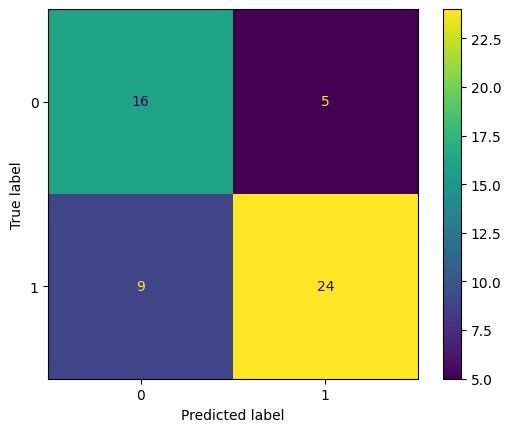

In [72]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log_reg_model_X.classes_)
disp.plot();

In [73]:
log_reg_model_Xproj30 = LogisticRegression(max_iter=1000)

log_reg_model_Xproj30.fit(X_train_proj30, y_train)

LogisticRegression(max_iter=1000)

In [74]:
y_pred_log_Xproj30 = log_reg_model_Xproj30.predict(X_val_proj30)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred_log_Xproj30)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred_log_Xproj30))

Accuracy: 0.7592592592592593

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.81      0.72        21
           1       0.86      0.73      0.79        33

    accuracy                           0.76        54
   macro avg       0.76      0.77      0.76        54
weighted avg       0.78      0.76      0.76        54



In [75]:
cm = confusion_matrix(y_val, y_pred_log_Xproj30, labels=log_reg_model_Xproj30.classes_)
cm

array([[17,  4],
       [ 9, 24]])

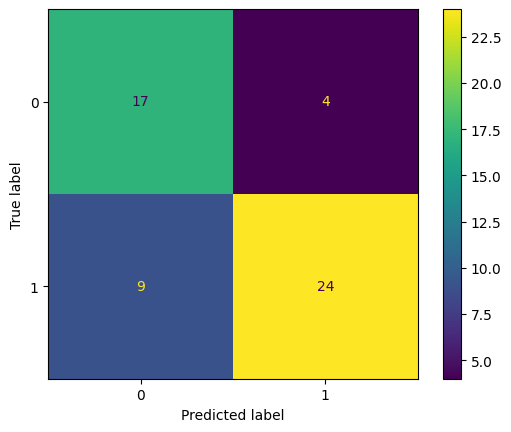

In [76]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log_reg_model_Xproj30.classes_)
disp.plot();

In [77]:
# The two models to be saved are: 

# sgd_X = SGDClassifier(alpha=0.001, loss='modified_huber', penalty='l2')

# svc_X = SVC(kernel='rbf', C=10, gamma='auto')

In [78]:
import joblib


# Save the models

joblib.dump(sgd_X, 'sgd_model.pkl')


['sgd_model.pkl']

In [79]:

joblib.dump(svc_X, 'svc_model.pkl')

['svc_model.pkl']

In [80]:
## loading the saved models

loaded_svc_model = joblib.load('svc_model.pkl')
loaded_sgd_model = joblib.load('sgd_model.pkl')

In [81]:
# Make predictions using the loaded models


svc_predictions = loaded_svc_model.predict(X_val)
sgd_predictions = loaded_sgd_model.predict(X_val)

In [82]:
# Evaluate the accuracy of the predictions
svc_accuracy = accuracy_score(y_val, svc_predictions)
sgd_accuracy = accuracy_score(y_val, sgd_predictions)

In [83]:
print("SVC Model Accuracy:", svc_accuracy)
print("SGDClassifier Model Accuracy:", sgd_accuracy)

SVC Model Accuracy: 0.7962962962962963
SGDClassifier Model Accuracy: 0.7222222222222222


In [110]:
# import time
# import os
# import joblib


# def save_model(model_to_save = None,
#                model_type = None,
#                path_to_save = "/home/giovals/code/Klara-haas/brain_proteomics_project/brain_proteomics/model"
#               ):
#     """
#     Persist trained model locally on the hard drive at f"{path_to_save/model_type_{timestamp}.joblib"
#     """

#     timestamp = time.strftime("%Y%m%d-%H%M%S")

#     # Save model locally
#     model_path_file = os.path.join(f"{path_to_save}/{model_type}_{timestamp}.joblib")

#     joblib.dump(model_to_save, model_path_file)

#     print(f"✅ Model saved locally at {model_path_file}")

In [112]:
# save_model(svc_X)

In [84]:
##### FEATURE PERMUTATION ######

from sklearn.inspection import permutation_importance

In [85]:


# # Fit model
# log_model_FP = LogisticRegression().fit(X_train, y_train) 

# # Performs Permutation
# permutation_score = permutation_importance(log_model_FP, X_train, y_train, n_repeats=50) 

# # Unstack results showing the decrease in performance after shuffling features
# importance_df = pd.DataFrame(np.vstack((X.columns,
#                                         permutation_score.importances_mean)).T) 
# importance_df.columns=['feature','score decrease']

# # Show the important features
# importance_df.sort_values(by="score decrease", ascending = False) 

In [86]:
svc = SVC(kernel='rbf', C=10, gamma='auto')
svc.fit(X_train, y_train)

# Step 3: Evaluate initial model performance
initial_accuracy_svc = accuracy_score(y_val, svc.predict(X_val))
print("Initial accuracy of SVC:", initial_accuracy_svc)

# Step 4: Perform feature permutation and calculate feature importance
result_svc = permutation_importance(svc, X_val, y_val, n_repeats=20)
importance_svc = result_svc.importances_mean

# Step 5: Create a DataFrame with feature names and their importance
feature_importance_df_svc = pd.DataFrame(np.vstack((X.columns,
                                        result_svc.importances_mean)).T)

feature_importance_df_svc.columns=['feature','score decrease']

feature_importance_df_svc = feature_importance_df_svc.sort_values(by='score decrease', ascending=False)


feature_importance_df_svc

Initial accuracy of SVC: 0.7962962962962963


,feature,score decrease
0,years_to_birth,0.057407
130,STAT3_pY705_p,0.037037
117,Paxillin_p,0.031481
1,gender,0.026852
48,Cyclin_B1_p,0.023148
...,...,...
113,PRAS40_pT246_p,-0.000926
25,Bad_pS112_p,-0.000926
105,PEA15_pS116_p,-0.002778
146,Tuberin_pT1462_p,-0.002778


In [87]:
len(feature_importance_df_svc[feature_importance_df_svc['score decrease']<=0.])

102

In [88]:
len(feature_importance_df_svc[feature_importance_df_svc['score decrease']>0.])

74

In [89]:
len(feature_importance_df_svc[feature_importance_df_svc['score decrease']>0.02])

7

In [90]:
feature_importance_df_svc[feature_importance_df_svc['score decrease']>0.02]

,feature,score decrease
0,years_to_birth,0.057407
130,STAT3_pY705_p,0.037037
117,Paxillin_p,0.031481
1,gender,0.026852
48,Cyclin_B1_p,0.023148
174,p90RSK_p,0.022222
140,Syk_p,0.021296


In [91]:
sgd_clf = SGDClassifier(alpha=0.001, loss='modified_huber', penalty='l2')
sgd_clf.fit(X_train, y_train)

# Step 3: Evaluate initial model performance
initial_accuracy_sgd = accuracy_score(y_val, sgd_clf.predict(X_val))
print("Initial accuracy of SGDClassifier:", initial_accuracy_sgd)

# Step 4: Perform feature permutation and calculate feature importance
result_sgd = permutation_importance(sgd_clf, X_val, y_val, n_repeats=20)

# Step 5: Create a DataFrame with feature names and their importance
feature_importance_df_sgd = pd.DataFrame(np.vstack((X.columns,
                                        result_sgd.importances_mean)).T)

feature_importance_df_sgd.columns=['feature','score decrease']

feature_importance_df_sgd = feature_importance_df_sgd.sort_values(by='score decrease', ascending=False)

feature_importance_df_sgd

Initial accuracy of SGDClassifier: 0.7407407407407407


,feature,score decrease
130,STAT3_pY705_p,0.068519
34,C-Raf_p,0.059259
7,4E-BP1_pT37_T46_p,0.059259
26,Bak_p,0.052778
28,Bax_p,0.049074
...,...,...
147,VEGFR2_p,-0.0
74,HER2_pY1248_p,-0.000926
44,Chk2_p,-0.002778
4,14-3-3_zeta_p,-0.003704


In [92]:
len(feature_importance_df_sgd[feature_importance_df_sgd['score decrease']<=0.])

46

In [93]:
len(feature_importance_df_sgd[feature_importance_df_sgd['score decrease']>0.02])

23

In [94]:
len(feature_importance_df_sgd[feature_importance_df_sgd['score decrease']>0.01])

55

In [95]:
feature_importance_df_sgd[feature_importance_df_sgd['score decrease']>0.01].head(50)

,feature,score decrease
105,PEA15_pS116_p,0.060185
174,p90RSK_p,0.052778
1,gender,0.04537
50,Cyclin_E1_p,0.041667
8,4E-BP1_pT70_p,0.041667
155,c-Kit_p,0.040741
40,Caspase-7_cleavedD198_p,0.034259
140,Syk_p,0.034259
34,C-Raf_p,0.02963
3,14-3-3_epsilon_p,0.028704


In [113]:
feature_importance_df_sgd['score decrease'].sum()

1.8972222222222197

In [96]:
# Lets say I drop all the features

In [97]:
# # Step 1: Train your models
# models = {
#     'Logistic Regression': LogisticRegression(max_iter=1000),
#     'SVC': SVC(kernel='rbf', C=10, gamma='auto'),
#     'SGD Classifier': SGDClassifier(alpha=0.001, loss='modified_huber', penalty='l2')
# }

# for name, model in models.items():
#     model.fit(X_train, y_train)

# # Step 2: Evaluate initial model performance
# initial_performance = {}
# for name, model in models.items():
#     y_pred = model.predict(X_val)
#     initial_performance[name] = accuracy_score(y_val, y_pred)

# print("Initial Model Performance:")
# print(initial_performance)

# # Step 4-7: Perform feature permutation and calculate feature importance
# feature_importance = {}
# for name, model in models.items():
#     importance = np.zeros(X_val.shape[1])
#     for i in range(X_val.shape[1]):
#         X_val_permuted = X_val.copy()
#         np.random.shuffle(X_val_permuted[:, i])
#         y_pred_permuted = model.predict(X_val_permuted)
#         importance[i] = accuracy_score(y_val, y_pred_permuted) - initial_performance[name]
#     feature_importance[name] = importance

# # Step 8: Rank features by importance
# average_importance = np.mean([importance for importance in feature_importance.values()], axis=0)
# sorted_indices = np.argsort(average_importance)[::-1]  # Sort indices in descending order of importance

# print("\nFeature Importance:")
# for i, idx in enumerate(sorted_indices):
#     print(f"Feature {idx}: Importance = {average_importance[idx]}")